<a href="https://colab.research.google.com/github/FranciscaAlliende/APS-Failure-at-Scania-Trucks/blob/master/SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# setup
import matplotlib.pyplot as plt
import pandas as pd
from imblearn.over_sampling import SMOTE # to do: found lastest version
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier # to do: found lastest version
from sklearn.ensemble import RandomForestClassifier
# my libraries 
import basic_prepro as bp
import null_values as nv
import evaluation_metrics as em

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
# load data
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/aps_failure_training_set.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/aps_failure_test_set.csv')

In [4]:
# basic prepocessing
# replace in class column: pos = 1; neg = 0
# replace the na and nan values with np.NaN
train = bp.data_prepro(train)
test = bp.data_prepro(test)

In [5]:
# null values
# drop the features with more than t% of null values on the train set 
# fill the remaining null values with the median of the corresponding feature with SimpleImputer(strategy = "median").
[y_train, X_train, y_test, X_test] = nv.null_values(train, test, t=0.5)

In [6]:
# transform the dataset with SMOTE
oversample = SMOTE() ## to do: found the aìlatest version
X_train_up, y_train_up = oversample.fit_resample(X_train, y_train) 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [7]:
# change format
X_train_up = pd.DataFrame(X_train_up)
X_train_up.columns = X_train.columns

y_train_up = pd.DataFrame(y_train_up)
y_train_up.columns = ["class"]

In [8]:
# check
print(X_train.shape)
print(X_train_up.shape)
print(y_train.shape)
print(y_train_up.shape)

(60000, 162)
(118000, 162)
(60000,)
(118000, 1)


In [9]:
# clases distributions before
old_classes = y_train.value_counts()
old_classes

0    59000
1     1000
Name: class, dtype: int64

In [10]:
# clases distributions after
new_classes = y_train_up["class"].value_counts()
new_classes

1    59000
0    59000
Name: class, dtype: int64

False positives:  90
False negatives:  61
Total cost: 31400
Confusion matrix, without normalization


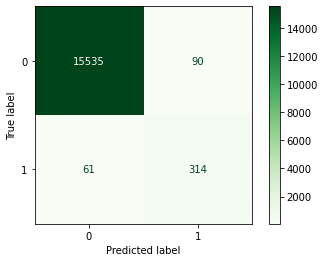

     Normalized confusion matrix


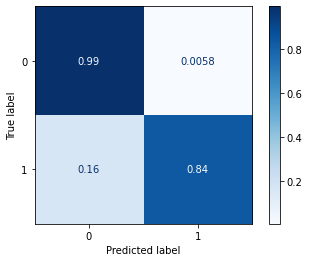

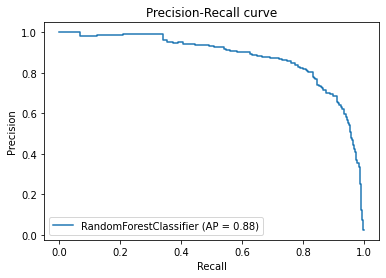

f1 score 0.806
precision:  0.777
recall 0.837


(31400, 0.8061617458279847, 0.7772277227722773, 0.8373333333333334)

In [13]:
# RF
clf_RF = RandomForestClassifier(random_state=333)
# training 
clf_RF.fit(X_train_up, y_train_up["class"].values)
# prediction
y_pred_RF = clf_RF.predict(X_test)
# evaluation
em.evaluation_metrics(y_pred_RF, y_test, X_test, clf_RF, c1=10, c2=500)

False positives:  426
False negatives:  53
Total cost: 30760
Confusion matrix, without normalization


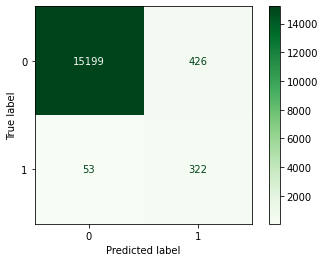

     Normalized confusion matrix


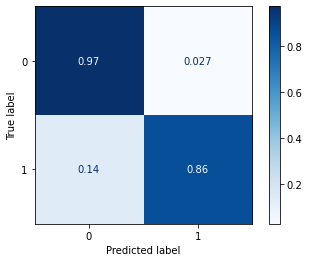

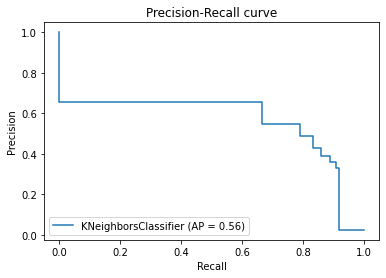

f1 score 0.573
precision:  0.43
recall 0.859


(30760, 0.5734639358860196, 0.4304812834224599, 0.8586666666666667)

In [15]:
# k-NN
neigh = KNeighborsClassifier(n_neighbors=7)
# training 
neigh.fit(X_train_up, y_train_up["class"].values)
# prediction
y_pred_neigh = neigh.predict(X_test)
# evaluation
em. evaluation_metrics(y_pred_neigh, y_test, X_test, neigh, c1=10, c2=500)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


False positives:  484
False negatives:  26
Total cost: 17840
Confusion matrix, without normalization


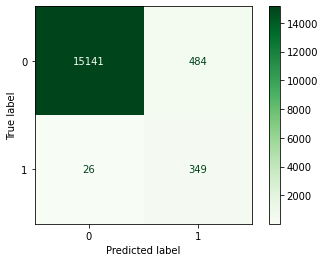

     Normalized confusion matrix


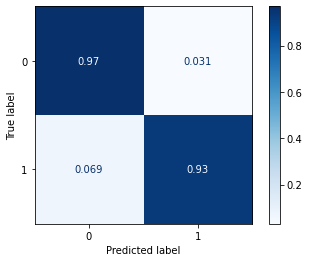

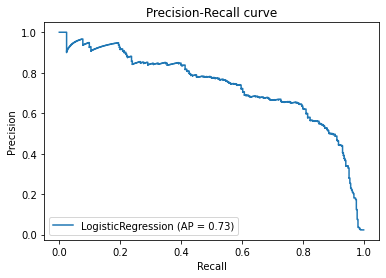

f1 score 0.578
precision:  0.419
recall 0.931


(17840, 0.5778145695364238, 0.4189675870348139, 0.9306666666666666)

In [16]:
# LR
clf_LR = LogisticRegression()
# training 
clf_LR.fit(X_train_up, y_train_up["class"].values)
# prediction
y_pred_LR = clf_LR.predict(X_test)
# evaluation
em. evaluation_metrics(y_pred_LR, y_test, X_test, clf_LR, c1=10, c2=500)

False positives:  659
False negatives:  28
Total cost: 20590
Confusion matrix, without normalization


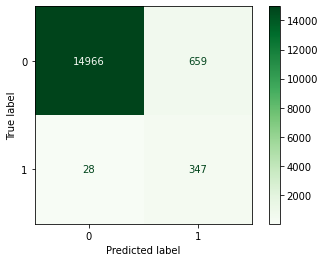

     Normalized confusion matrix


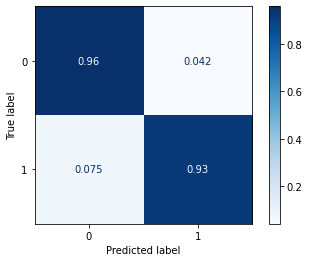

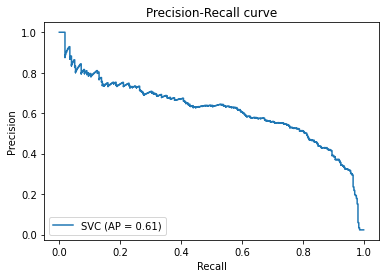

f1 score 0.503
precision:  0.345
recall 0.925


(20590, 0.502534395365677, 0.34493041749502984, 0.9253333333333333)

In [17]:
# SVM
clf_SVM = svm.SVC()
# training 
clf_SVM.fit(X_train_up, y_train_up["class"].values)
# prediction
y_pred_SVM = clf_SVM.predict(X_test)
# evaluation
em. evaluation_metrics(y_pred_SVM, y_test, X_test, clf_SVM, c1=10, c2=500)